# Capstone Analytic Report

### Thinkful Prep Course

Author: Vincent Diguet

Email: vincent.diguet@dunnhumby.com

Mentor: Alex Mirina

Date: 2017/03/23



# Data Description

As the original source says, A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
 It includes both a CSV file and SQLite database. 

The following variables are available:
tweet_id                          
airline_sentiment                
airline_sentiment_confidence : Probability that the sentiment of tweet is correctly classified
negativereason                   
negativereason_confidence       
airline                          
airline_sentiment_gold           
name                             
negativereason_gold              
retweet_count                     
text                             
tweet_coord                      
tweet_created                    
tweet_location                   
user_timezone                    

## Twitter US Airline Sentiment Context

For many, Twitter has become a de facto online customer service platform. For instance, every month Twitter users send over 100,000 questions, complaints, and comments to major US airlines.

Customer service experts know that while one happy, satisfied customer might tell five friends and family members about their pleasant experience, an unhappy customer is more likely to share the bad news with up to 100 people.

Another study shows that customers who suffered a bad interaction were 50% more likely to share it on social media than those who had good experiences (45% vs. 30%). That’s particularly problematic for companies getting bad reviews: separate research indicates that 86% of customers who have read negative reviews claimed that the information impacted their buying decision.

Dealing with social media is critical for US airlines as good – and bad – customer service interactions affect brand loyalty.

## Twitter US Airline Sentiment Data Import


In [10]:
#Import Twitter US Airline Sentiment Data

import pandas as pd
import numpy as np
df = pd.read_csv('Tweets.csv')
#Print first 5 lines
'''print(df.head(5))'''
#List Column & Format
'''print(df.dtypes)
print(len(df))'''

'print(df.dtypes)\nprint(len(df))'

# Data Analysis


## Which company is more engaged via Twitter?

Let's understand first the number of tweets that each company received.
Have we got some Airlines for which customers that are more engaged with Twitter vs other ones?

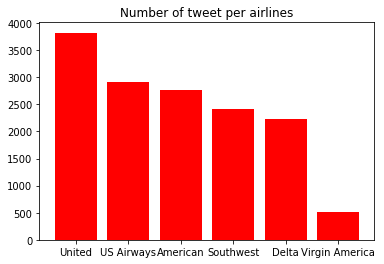

In [3]:
#Number of tweet per airlines
import matplotlib.pyplot as plt
nb_tweet=pd.pivot_table(df,index=["airline"],values=["tweet_id"],aggfunc="count",) #how do you give a name to the name variable?"

nb_tweet_sort = nb_tweet.sort_values(by='tweet_id', ascending=False)
#Create barchart
objects = list(nb_tweet_sort.index)
x_pos = np.arange(len(objects))
plt.bar(x_pos,nb_tweet_sort['tweet_id'], align='center', color='red', alpha=1)  # alpha just controls the opacity

plt.title('Number of tweet per airlines')
plt.xticks(x_pos, objects)
plt.show()

Thanks to this simple diagnostic we learnt that :
- Customers from United are most active on twitter.
- US Airways, American are comparable level of activity
- Virgin customers are the least active
    
This insight needs to be analysed with their relative size.
Based on offical data from 2015, Delta Airline was far bigger that United in term of number of passengers.

So let's understand the level of activity of each airline, related to their size


In [16]:
# Let's try first a disctionnary with the number of passengers of each airline 
airlines_passenger = {
    "United": 140441000,
    "US Airways" :82546120,
    "American" : 107806578,
    "Southwest" :133978100,
    "Delta" :164571529,
    "Virgin" : 6219000,
 }
airlines_tweet = {
    "United": 3822,
    "US Airways" :2913,
    "American" : 2759,
    "Southwest" : 2420,
    "Delta" : 2222,
    "Virgin" : 504
 }

'''The Multiplication per 52 is necessary to get an annual view as we have only one week of data'''
United=airlines_tweet["United"]/airlines_passenger["United"]*52*100
Airways=airlines_tweet["US Airways"]/airlines_passenger["US Airways"]*52*100
American=airlines_tweet["American"]/airlines_passenger["American"]*52*100
Southwest=airlines_tweet["Southwest"]/airlines_passenger["Southwest"]*52*100
Delta=airlines_tweet["Delta"]/airlines_passenger["Delta"]*52*100
Virgin=airlines_tweet["Virgin"]/airlines_passenger["Virgin"]*52*100

print("%age of active customers on twitter for Virgin is {:01.2f}%".format(Virgin))
print("%age of active customers on twitter for US Airways is {:01.2f}%".format(Airways))
print("%age of active customers on twitter for United is {:01.2f}%".format(United))
print("%age of active customers on twitter for American is {:01.2f}%".format(American))
print("%age of active customers on twitter for Southwest is {:01.2f}%".format(Southwest))
print("%age of active customers on twitter for Delta is {:01.2f}%".format(Delta))




%age of active customers on twitter for Virgin is 0.42%
%age of active customers on twitter for US Airways is 0.18%
%age of active customers on twitter for United is 0.14%
%age of active customers on twitter for American is 0.13%
%age of active customers on twitter for Southwest is 0.09%
%age of active customers on twitter for Delta is 0.07%


The analysis is given us a totally different perspective with Virgin being relative to its size, now the company the most active on Twitter with 0.42% of their customers posting tweets.

## Which sentiment customers posted in Twitter?

### Using Binomial Distribution

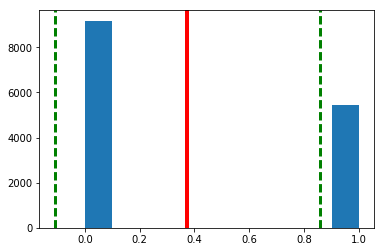

In [5]:
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Tweets.csv')
df['flag'] = np.where(df['airline_sentiment'] == "negative",0,1); df

flag2=df['flag']

plt.hist(flag2)
# Add a vertical line at the mean.
plt.axvline(flag2.mean(), color='r', linestyle='solid', linewidth=4)
# Add a vertical line at one standard deviation above the mean.
plt.axvline(flag2.mean() + flag2.std(), color='g', linestyle='dashed', linewidth=3)
# Add a vertical line at one standard deviation below the mean.
plt.axvline(flag2.mean()-flag2.std(), color='g', linestyle='dashed', linewidth=3)

plt.show()

Thanks to this simple analysis we see that most of the sentiment are skewed toward negative sentiment.

Sentiments for US Airlines has an higher probability to be negative than positive

### Using Pie Chart


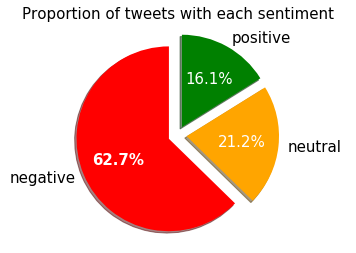

In [6]:
prop_tweet=pd.pivot_table(df,index=["airline_sentiment"],values=["tweet_id"],aggfunc="count") 

#Create Pie Chart
import matplotlib.pyplot as plt
%matplotlib inline
color=("red","orange","green")
explode=(0.1, 0.1, 0.1)
labels=("negative","neutral","positive")
patches, texts, autotexts = plt.pie(prop_tweet['tweet_id'], explode=explode,autopct='%1.1f%%', labels=labels,shadow=True, startangle=90, colors=color)
plt.axis('equal')
plt.title('Proportion of tweets with each sentiment').set_fontsize(15)
autotexts[0].set_weight("bold")
autotexts[0].set_color("White")
autotexts[1].set_color("White")
autotexts[2].set_color("White")
autotexts[0].set_fontsize(15)
autotexts[1].set_fontsize(15)
autotexts[2].set_fontsize(15)
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)
plt.show()

This analysis validated researches mentioned previously showing that a large majority of unhappy customers will use Social Media to convey their unhappiness.

Based on this data:
- 62.7% of the tweets received by airlines are negative
- 21.2% are Neutral
- Only 16.1% are Positive

    
Customers are more likely to share their bad experience than their good one.

## How sentiments differ across the different airlines?


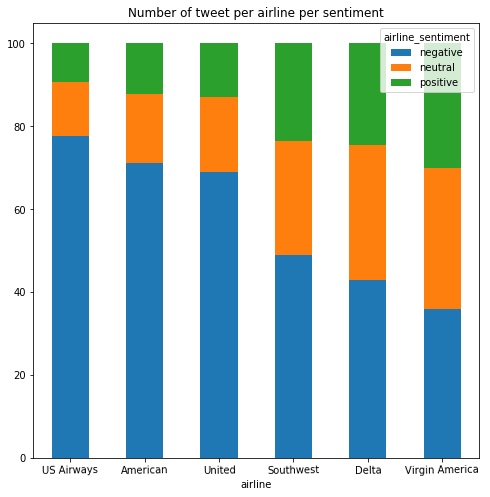

In [7]:
#Number of tweet per airlines per sentiment
df_trunc1=df[['airline','airline_sentiment','tweet_id']]
nb_tweet_air=df_trunc1.groupby(['airline','airline_sentiment'])['tweet_id'].count()

# Change: groupby airline and divide by sum
air_tweet_pcts = nb_tweet_air.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
nb_tweet_sort = nb_tweet.sort_values(by='tweet_id', ascending=False)

air_tweet_pcts.unstack().sort_values(by='negative',ascending=False).plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title='Number of tweet per airline per sentiment')

plt.show()

We see that American, United and US Airways tweets are mostly negative (more than 2/3).
However, tweets directed towards Delta, Southwest and Virgin contain a good proportion of neutral and positive sentiment tweets

Very interesting to see that Virgin, relative to the other companies, has 60% of the tweets directed to them are Positive or Neutral.
Knowing that it is the company that receives the highest level of tweets relatively to its size we can conclude that their customers are more willing to communicate positive feedback.

This could be explained by the fact that Virgin targets young (18-30 years old), tech-savvy city dwellers, with upper-middle class income that are therefore using social media in a different way

## What are the main reasons of the negative tweets?

We will focus on understanding overall drivers of the negative tweets as well as focusing on US Airways (Airline company with the highest proportion of tweets directed to).



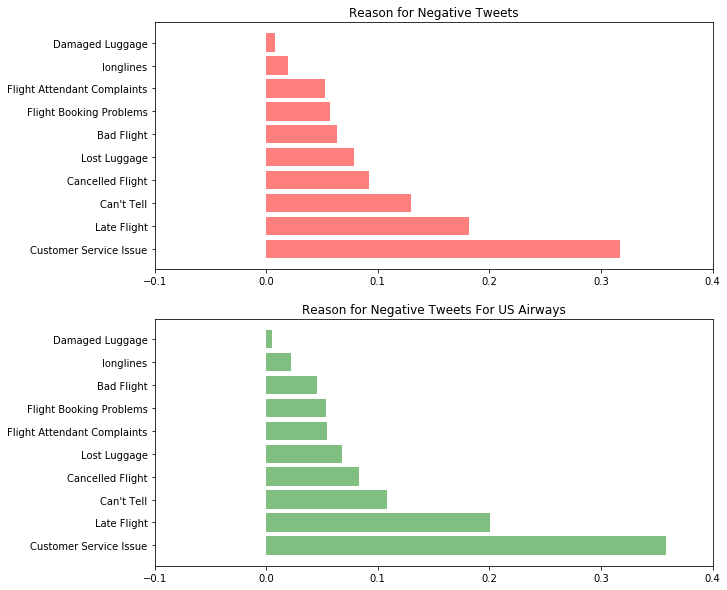

In [8]:
#Reason of negative tweet

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)

'''***********************
    TOTAL AIRLINES
**********************'''

#Keep only negative tweet
neg_tweet_1=df.ix[lambda df: df['airline_sentiment'] == "negative" , :]

#pivot reason for negative tweet
neg_tweet=pd.pivot_table(neg_tweet_1,index=["negativereason"],values=["tweet_id"],aggfunc="count",) 

neg_tweet['perc']= neg_tweet['tweet_id']/neg_tweet['tweet_id'].sum()


# Change: groupby airline and divide by sum

neg_tweet_sort = neg_tweet.sort_values(by='tweet_id', ascending=False)

#Create horizontal barchart
objects = list(neg_tweet_sort.index)
y_pos = np.arange(len(objects))
plt.barh(y_pos,neg_tweet_sort['perc'], align='center', color='red', alpha=.5)  # alpha just controls the opacity
plt.xlim([-0.1, 0.4])
plt.title('Reason for Negative Tweets')
plt.yticks(y_pos, objects)

'''***********************
    TOTAL US AIRWAYS
**********************'''
plt.subplot(2, 1, 2)
#Keep only negative tweet
neg_tweet_us=neg_tweet_1.ix[lambda neg_tweet: neg_tweet['airline'] == "US Airways" , :]

#pivot reason for negative tweet
neg_tweet_us=pd.pivot_table(neg_tweet_us,index=["negativereason"],values=["tweet_id"],aggfunc="count",) 

neg_tweet_us['perc']= neg_tweet_us['tweet_id']/neg_tweet_us['tweet_id'].sum()

# Change: groupby airline and divide by sum

neg_tweet_us_sort = neg_tweet_us.sort_values(by='tweet_id', ascending=False)

#Create horizontal barchart
objects = list(neg_tweet_us_sort.index)
y_pos = np.arange(len(objects))
plt.barh(y_pos,neg_tweet_us_sort['perc'], align='center', color='green', alpha=.5)  # alpha just controls the opacity
plt.xlim([-0.1, 0.4])
plt.title('Reason for Negative Tweets For US Airways')
plt.yticks(y_pos, objects)
plt.show()

The main driver of the negative tweets is mostly elicited by Customer Service Issues, followed by Late Flights.

More than 50% of the negatives tweets are explained by these 2 key reasons.

These are actually what customers expect from an airline companies and when these 2 basics needs are not addressed, customers are complaining about it.
In order to improve customer satisfaction level, airlines need to focus on these 2 issues.

US Airways is performing even worst against these 2 items. It appears that there is a level of correlation between the 2 issues and the overall sentiment.
This may need to be investigated further.

Another way to understand and represent is to generate “word clouds” from the airline sentiment field. The clouds give greater prominence to words that appear more frequently.



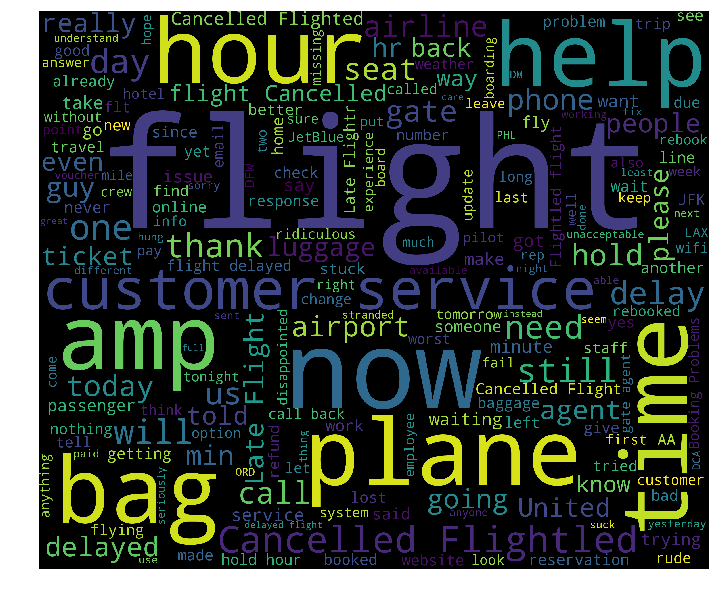

In [9]:
from wordcloud import WordCloud,STOPWORDS
df2=df[df['airline_sentiment']=='negative']
words = ' '.join(df2['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The world clouds help us to identify quicly the main reason behind the negative sentiment. Customer Service is clearly visible as one of the main driver.


# Next Steps

## Tweets by geography
Understand via a map which city is the most active?

## Tweets by timezone

## Retweet Analysis 
How many tweets are retweets?
Which type of tweets are retweeted?

## Analysis of text content of tweets
Language model for sentiment analysis

##  Natural language Analysis 
Exploration of natural language processing techniques
